### Імпортуємо бібліотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
import warnings
import numpy as np
warnings.filterwarnings('ignore')

### Зчитуємо дані для аналізу

In [2]:
oil_prices = pd.read_csv('../data/oil-prices-master/data/brent-year.csv')
wti = pd.read_csv('../data/oil-prices-master/data/wti-year.csv')
population = pd.read_csv('../data/population-master/data/population.csv')
ppp = pd.read_csv('../data/ppp-master/data/ppp-gdp.csv')

# Населення за інтервал часу 1960-2018рр. 

### _Зобразимо за допомогою лінійного графіку_

In [3]:
# Оберемо з датасету population необхідні країнии згідно варіанту: Malaysia, Poland, Rwanda
population_of_Malaysia = population[population['Country Name'] == 'Malaysia']
population_of_Poland = population[population['Country Name'] == 'Poland']
population_of_Rwanda = population[population['Country Name'] == 'Rwanda']

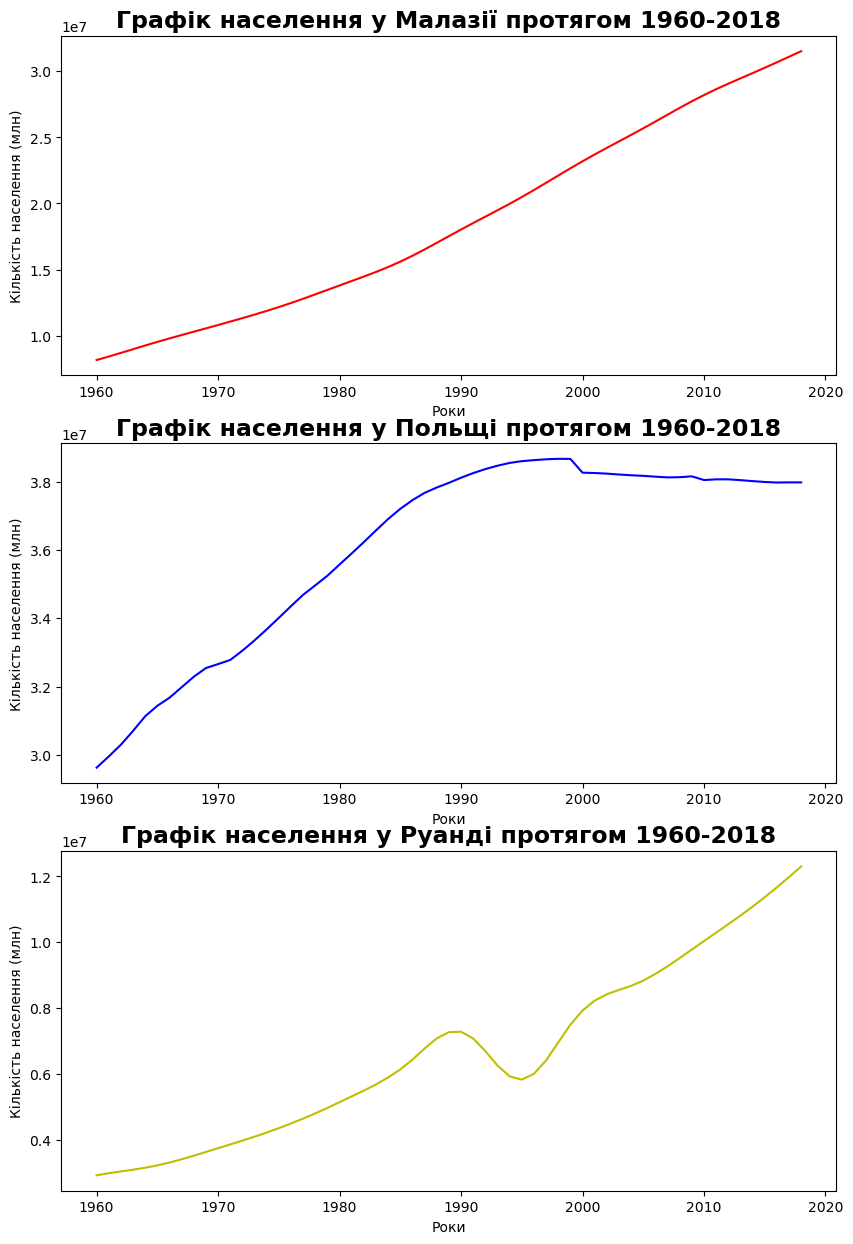

In [4]:
# Побудуємо графіки
fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,15))

ax1.plot(population_of_Malaysia ['Year'], population_of_Malaysia ['Value'], c='r')
ax1.set_title('Графік населення у Малазії протягом 1960-2018', fontweight ='bold', fontsize = 17)
ax1.set_xlabel('Роки',  fontsize = 10)
ax1.set_ylabel('Кількість населення (млн)', fontsize = 10)

ax2.plot(population_of_Poland['Year'], population_of_Poland['Value'], c='b')
ax2.set_title('Графік населення у Польщі протягом 1960-2018', fontweight ='bold', fontsize = 17)
ax2.set_xlabel('Роки',  fontsize = 10)
ax2.set_ylabel('Кількість населення (млн)', fontsize = 10)

ax3.plot(population_of_Rwanda['Year'], population_of_Rwanda['Value'], c='y')
ax3.set_title('Графік населення у Руанді протягом 1960-2018', fontweight ='bold', fontsize = 17)
ax3.set_xlabel('Роки', fontsize = 10)
ax3.set_ylabel('Кількість населення (млн)', fontsize = 10)

plt.show()
# Збережемо отриманий рисунок 
fig1.savefig('../img/population_in_countries1.png')

### _Зобразимо за допомогою стовпчастої гістограми_

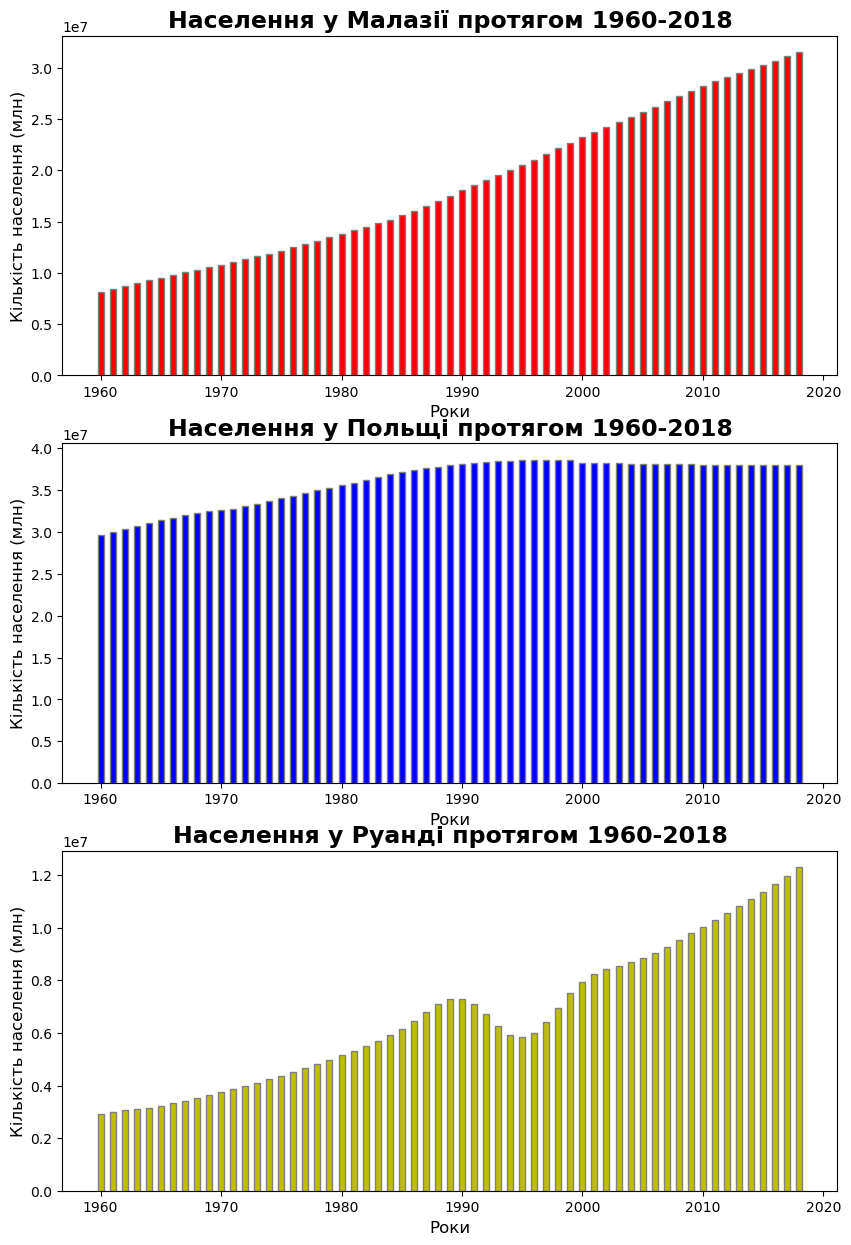

In [5]:
fig2, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,15))

ax1.bar(population_of_Malaysia['Year'], population_of_Malaysia['Value'], color ='r', width = 0.5, edgecolor ='grey')
ax1.set_title('Населення у Малазії протягом 1960-2018', fontweight ='bold', fontsize = 17)
ax1.set_xlabel('Роки', fontsize = 12)
ax1.set_ylabel('Кількість населення (млн)', fontsize = 12)

ax2.bar(population_of_Poland['Year'], population_of_Poland['Value'], color ='b', width = 0.5, edgecolor ='grey')
ax2.set_title('Населення у Польщі протягом 1960-2018', fontweight ='bold', fontsize = 17)
ax2.set_xlabel('Роки', fontsize = 12)
ax2.set_ylabel('Кількість населення (млн)', fontsize = 12)

ax3.bar(population_of_Rwanda['Year'], population_of_Rwanda['Value'], color ='y', width = 0.5, edgecolor ='grey')
ax3.set_title('Населення у Руанді протягом 1960-2018', fontweight ='bold', fontsize = 17)
ax3.set_xlabel('Роки', fontsize = 12)
ax3.set_ylabel('Кількість населення (млн)', fontsize = 12)

plt.show()
# Збережемо отриманий рисунок 
fig2.savefig('../img/population_in_countries2.png')

### _Зобразимо за допомогою секторної (кругової) діаграми_ 

Для кращої наочності вирішено побудувати діаграму на основі даних отриманих протягом 2014-2018 років.

In [6]:
period_5y = [int(i) for i in range(2014, 2019)]

In [7]:
malaysia_period_5y = population_of_Malaysia[population_of_Malaysia['Year'].isin(period_5y)]
poland_period_5y = population_of_Poland[population_of_Poland['Year'].isin(period_5y)]
rwanda_period_5y = population_of_Rwanda[population_of_Rwanda['Year'].isin(period_5y)]

period = [str(i) for i in period_5y]

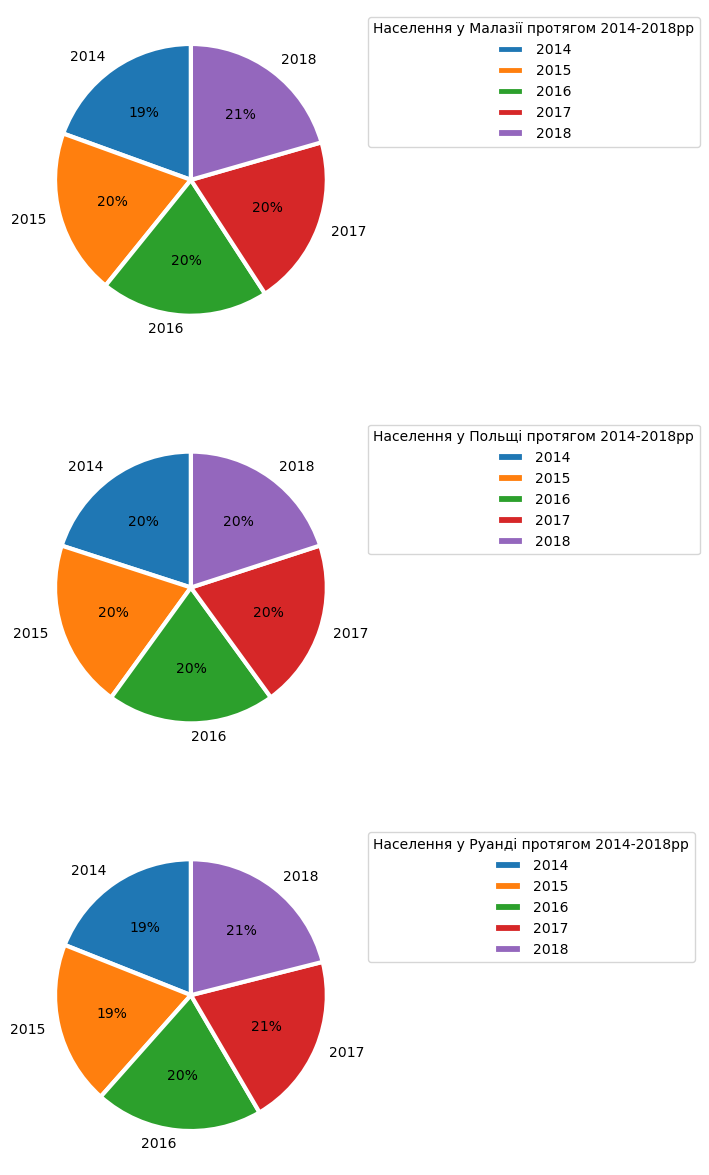

In [8]:
fig3, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25,15))

ax1.pie(malaysia_period_5y['Value'], labels=period, startangle = 90, autopct='%1.0f%%',
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax1.legend(title = "Населення у Малазії протягом 2014-2018рр", bbox_to_anchor=(1., 1.))

ax2.pie(poland_period_5y['Value'], labels=period, startangle = 90, autopct='%1.0f%%',
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax2.legend(title = "Населення у Польщі протягом 2014-2018рр", bbox_to_anchor=(1., 1.))

ax3.pie(rwanda_period_5y['Value'], labels=period, startangle = 90, autopct=f'%1.0f%%',
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax3.legend(title = "Населення у Руанді протягом 2014-2018рр", bbox_to_anchor=(1., 1.))

plt.show()

# Збережемо отриманий рисунок 
fig3.savefig('../img/population_in_countries3.png')

# Основні статистичні величини

In [9]:
population_of_Malaysia_static = population_of_Malaysia['Value'].describe(include='all', percentiles=[.25, .75, .95])
population_of_Malaysia_static

count    5.900000e+01
mean     1.857272e+07
std      7.306815e+06
min      8.156347e+06
25%      1.201665e+07
50%      1.752896e+07
75%      2.494474e+07
95%      3.031235e+07
max      3.152858e+07
Name: Value, dtype: float64

In [10]:
population_of_Poland_static = population_of_Poland['Value'].describe(include='all', percentiles=[.25, .75, .95])
population_of_Poland_static

count    5.900000e+01
mean     3.607957e+07
std      2.803057e+06
min      2.963745e+07
25%      3.384705e+07
50%      3.796153e+07
75%      3.815852e+07
95%      3.862690e+07
max      3.866348e+07
Name: Value, dtype: float64

In [11]:
population_of_Rwanda_static = population_of_Rwanda['Value'].describe(include='all', percentiles=[.25, .75, .95])
population_of_Rwanda_static

count    5.900000e+01
mean     6.633860e+06
std      2.685727e+06
min      2.935582e+06
25%      4.298142e+06
50%      6.263757e+06
75%      8.618842e+06
95%      1.139905e+07
max      1.230194e+07
Name: Value, dtype: float64

# Зв'язок ціни на нафту (oil prices) з паритетом купівельної здатності (ррр)

In [12]:
# Оберемо з датасету 'ppp' необхідні країнии згідно варіанту: Malaysia, Poland, Rwanda
Malaysia_ppp = ppp[ppp['Country'] == 'Malaysia']
Poland_ppp = ppp[ppp['Country'] == 'Poland']
Rwanda_ppp = ppp[ppp['Country'] == 'Rwanda']

##### _Оскільки датасети мають відмінності, розбіжність по рокам, необхідно змержити їх._

In [13]:
# об'єднання(merging) таблиць 
oil_prices = oil_prices.rename(columns={"Date": "Year"})
Malaysia_oil_ppp = Malaysia_ppp.merge(oil_prices, how='inner', on='Year')
Poland_oil_ppp = Poland_ppp.merge(oil_prices, how='inner', on='Year')
Rwanda_oil_ppp = Rwanda_ppp.merge(oil_prices, how='inner', on='Year')

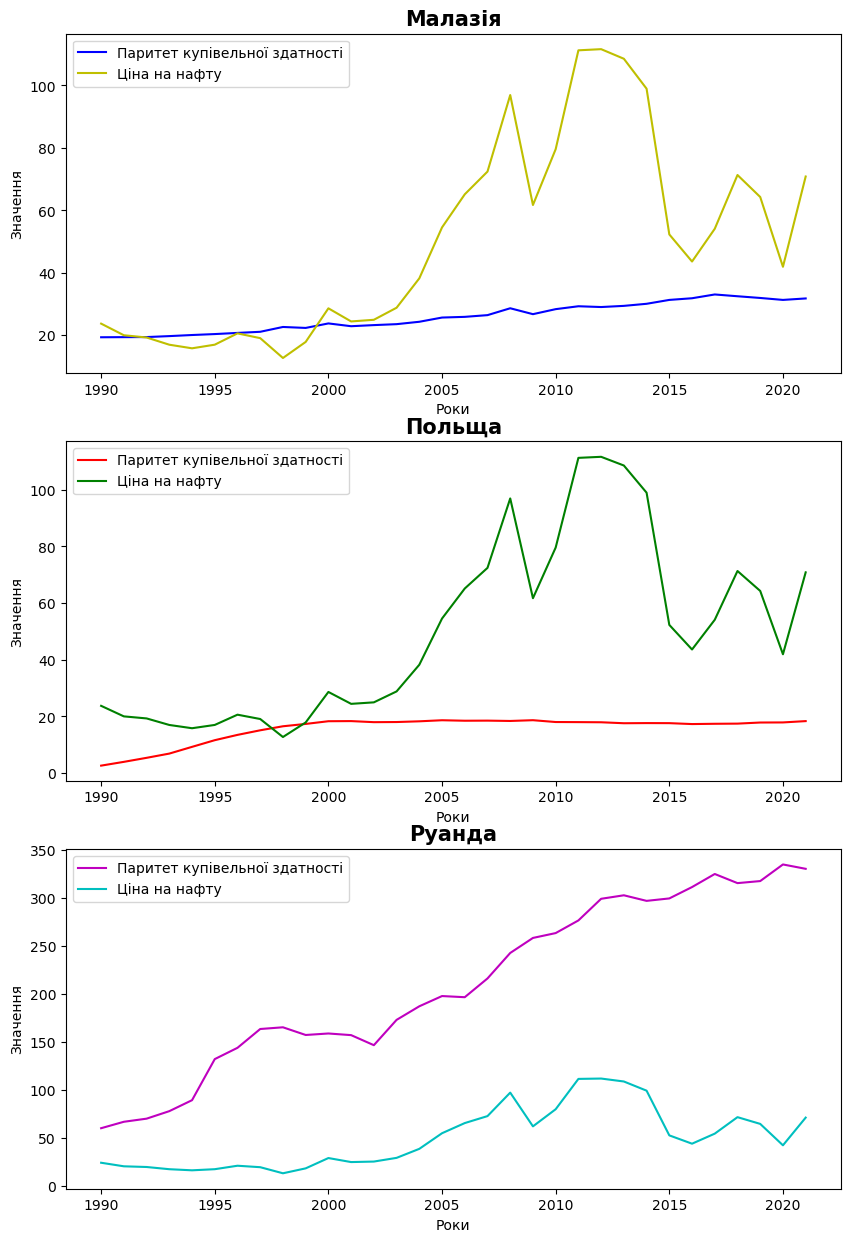

In [14]:
# Побудуємо графіки 
fig4, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,15))

ax1.plot(Malaysia_oil_ppp['Year'], Malaysia_oil_ppp['PPP']*20, c='b')
ax1.plot(Malaysia_oil_ppp['Year'], Malaysia_oil_ppp['Price'], c='y')
ax1.set_title('Малазія', fontweight ='bold', fontsize = 15)
ax1.set_xlabel('Роки', fontsize = 10)
ax1.set_ylabel('Значення',fontsize = 10)
ax1.legend(['Паритет купівельної здатності','Ціна на нафту'])

ax2.plot(Poland_oil_ppp['Year'], Poland_oil_ppp['PPP']*10, c='r')
ax2.plot(Poland_oil_ppp['Year'], Poland_oil_ppp['Price'], c='g')
ax2.set_title('Польща', fontweight ='bold', fontsize = 15)
ax2.set_xlabel('Роки', fontsize = 10)
ax2.set_ylabel('Значення', fontsize = 10)
ax2.legend(['Паритет купівельної здатності','Ціна на нафту'])

ax3.plot(Rwanda_oil_ppp['Year'], Rwanda_oil_ppp['PPP'], c='m')
ax3.plot(Rwanda_oil_ppp['Year'], Rwanda_oil_ppp['Price'], c='c')
ax3.set_title('Руанда', fontweight ='bold', fontsize = 15)
ax3.set_xlabel('Роки', fontsize = 10)
ax3.set_ylabel('Значення', fontsize = 10)
ax3.legend(['Паритет купівельної здатності','Ціна на нафту'])

plt.show()

# Збережемо отриманий рисунок 
fig4.savefig('../img/correlation_oil_prices_ppp.png')

# Зв'язок ціни на нафту (wti) з паритетом купівельної здатності (ррр)

In [15]:
# об'єднання(merging) таблиць 
wti = wti.rename(columns={"Date": "Year"})
Malaysia_wti_ppp = Malaysia_ppp.merge(wti, how='inner', on='Year')
Poland_wti_ppp = Poland_ppp.merge(wti, how='inner', on='Year')
Rwanda_wti_ppp = Rwanda_ppp.merge(wti, how='inner', on='Year')

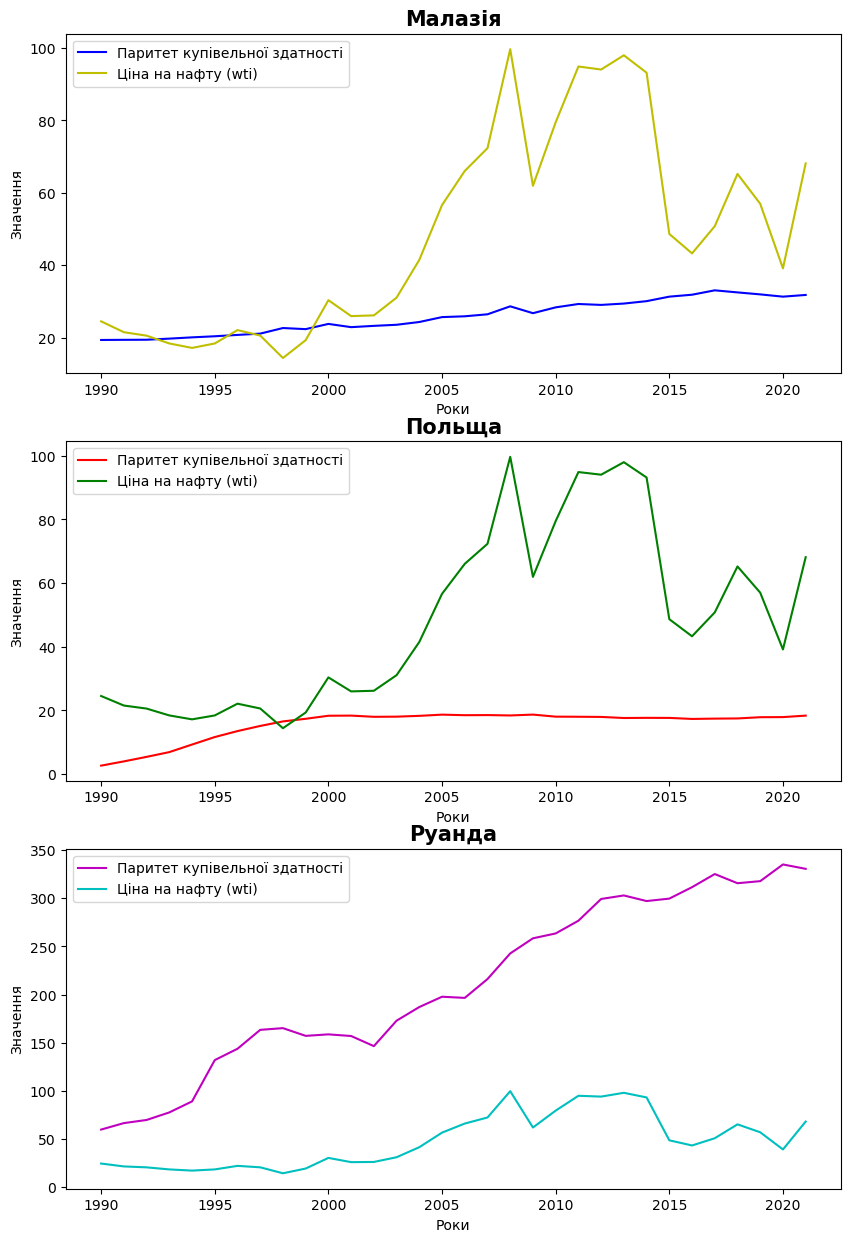

In [16]:
# Побудуємо графіки 
fig5, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,15))

ax1.plot(Malaysia_wti_ppp['Year'], Malaysia_wti_ppp['PPP']*20, c='b')
ax1.plot(Malaysia_wti_ppp['Year'], Malaysia_wti_ppp['Price'], c='y')
ax1.set_title('Малазія', fontweight ='bold', fontsize = 15)
ax1.set_xlabel('Роки', fontsize = 10)
ax1.set_ylabel('Значення',fontsize = 10)
ax1.legend(['Паритет купівельної здатності','Ціна на нафту (wti)'])

ax2.plot(Poland_wti_ppp['Year'], Poland_wti_ppp['PPP']*10, c='r')
ax2.plot(Poland_wti_ppp['Year'], Poland_wti_ppp['Price'], c='g')
ax2.set_title('Польща', fontweight ='bold', fontsize = 15)
ax2.set_xlabel('Роки', fontsize = 10)
ax2.set_ylabel('Значення', fontsize = 10)
ax2.legend(['Паритет купівельної здатності','Ціна на нафту (wti)'])

ax3.plot(Rwanda_wti_ppp['Year'], Rwanda_wti_ppp['PPP'], c='m')
ax3.plot(Rwanda_wti_ppp['Year'], Rwanda_wti_ppp['Price'], c='c')
ax3.set_title('Руанда', fontweight ='bold', fontsize = 15)
ax3.set_xlabel('Роки', fontsize = 10)
ax3.set_ylabel('Значення', fontsize = 10)
ax3.legend(['Паритет купівельної здатності','Ціна на нафту (wti)'])

plt.show()
# Збережемо отриманий рисунок 
fig5.savefig('../img/correlation_wti_ppp.png')

# Зв'язок між населенням країн та паритетом купівельної здатності (ррр)

In [17]:
# Об'єднання даних
Malaysia_popul_ppp = population_of_Malaysia.merge(Malaysia_ppp, how='inner', on='Year')
Poland_popul_ppp = population_of_Poland.merge(Poland_ppp, how='inner', on='Year')
Rwanda_popul_ppp = population_of_Rwanda.merge(Rwanda_ppp, how='inner', on='Year')

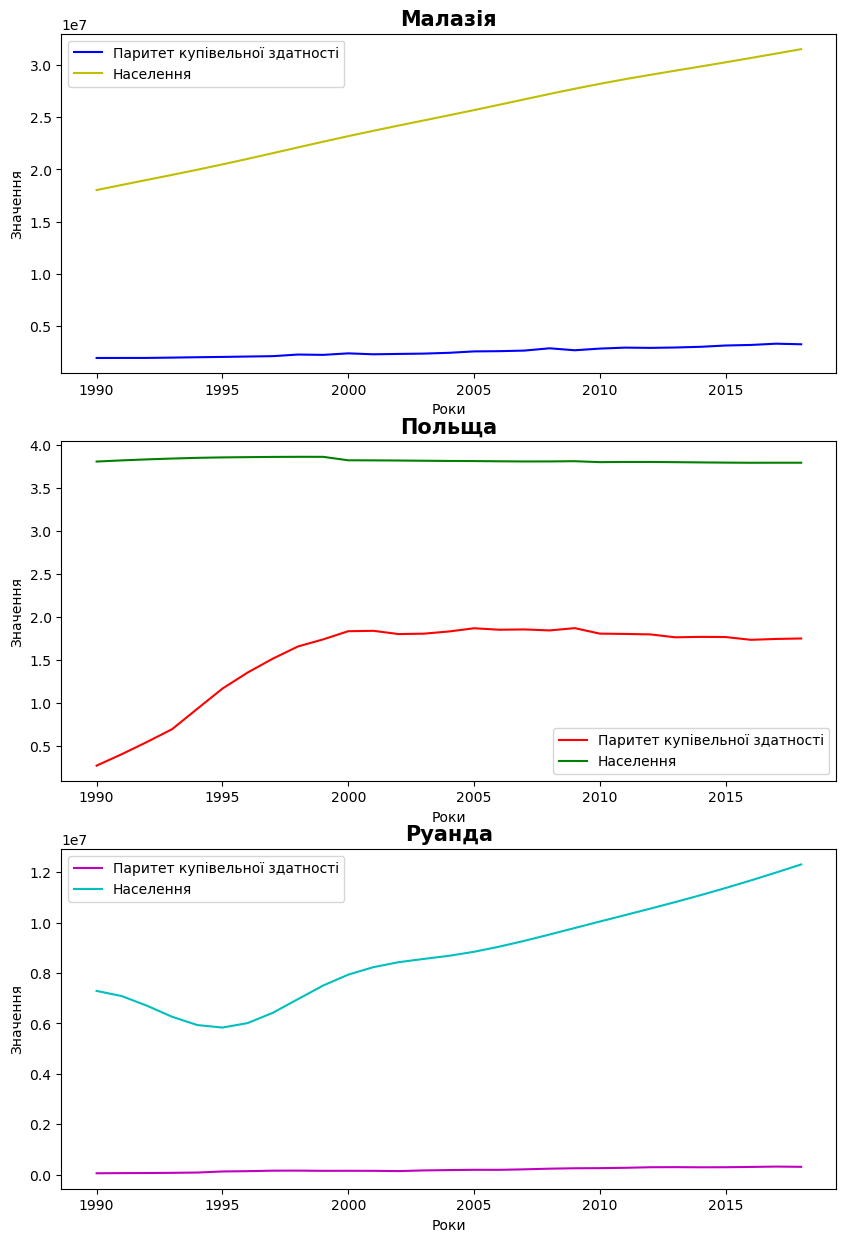

In [18]:
# Побудуємо графіки 
fig6, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,15))

ax1.plot(Malaysia_popul_ppp['Year'], Malaysia_popul_ppp['PPP']*2000000, c='b')
ax1.plot(Malaysia_popul_ppp['Year'], Malaysia_popul_ppp['Value'], c='y')
ax1.set_title('Малазія', fontweight ='bold', fontsize = 15)
ax1.set_xlabel('Роки', fontsize = 10)
ax1.set_ylabel('Значення',fontsize = 10)
ax1.legend(['Паритет купівельної здатності','Населення'])

ax2.plot(Poland_popul_ppp['Year'], Poland_popul_ppp['PPP'], c='r')
ax2.plot(Poland_popul_ppp['Year'], Poland_popul_ppp['Value']/10000000, c='g')
ax2.set_title('Польща', fontweight ='bold', fontsize = 15)
ax2.set_xlabel('Роки', fontsize = 10)
ax2.set_ylabel('Значення', fontsize = 10)
ax2.legend(['Паритет купівельної здатності','Населення'])

ax3.plot(Rwanda_popul_ppp['Year'], Rwanda_popul_ppp['PPP']*1000, c='m')
ax3.plot(Rwanda_popul_ppp['Year'], Rwanda_popul_ppp['Value'], c='c')
ax3.set_title('Руанда', fontweight ='bold', fontsize = 15)
ax3.set_xlabel('Роки', fontsize = 10)
ax3.set_ylabel('Значення', fontsize = 10)
ax3.legend(['Паритет купівельної здатності','Населення'])

plt.show()
# Збережемо отриманий рисунок 
fig6.savefig('../img/correlation_population_ppp.png')

# Зв'язок між налесенням та ціною на паливо

In [19]:
# Об'єднання даних
Malaysia_popul_oil = population_of_Malaysia.merge(oil_prices, how='inner', on='Year')
Poland_popul_oil = population_of_Poland.merge(oil_prices, how='inner', on='Year')
Rwanda_popul_oil = population_of_Rwanda.merge(oil_prices, how='inner', on='Year')

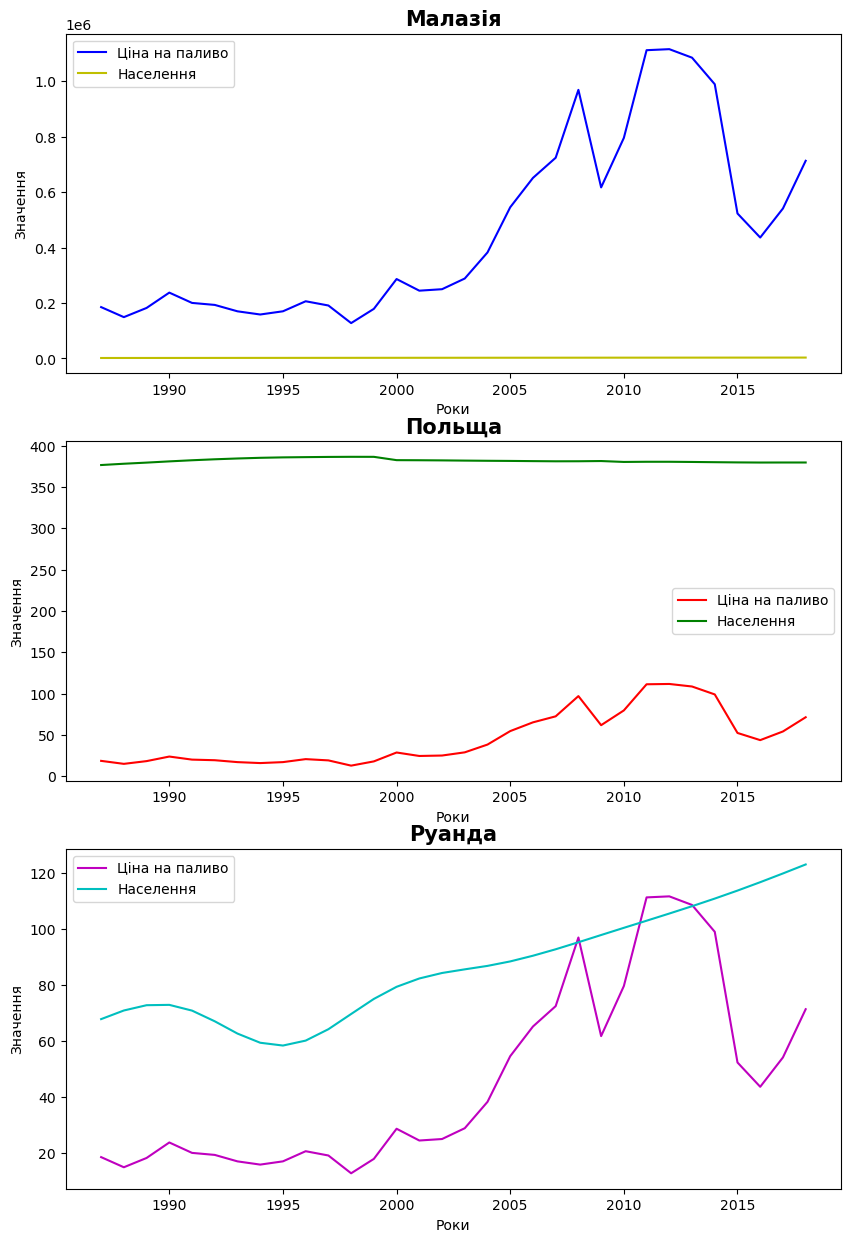

In [20]:
# Побудуємо графіки 
fig7, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,15))

ax1.plot(Malaysia_popul_oil['Year'], Malaysia_popul_oil['Price']*10000, c='b')
ax1.plot(Malaysia_popul_oil['Year'], Malaysia_popul_oil['Value']/10000, c='y')
ax1.set_title('Малазія', fontweight ='bold', fontsize = 15)
ax1.set_xlabel('Роки', fontsize = 10)
ax1.set_ylabel('Значення',fontsize = 10)
ax1.legend(['Ціна на паливо','Населення'])

ax2.plot(Poland_popul_oil['Year'], Poland_popul_oil['Price'], c='r')
ax2.plot(Poland_popul_oil['Year'], Poland_popul_oil['Value']/100000, c='g')
ax2.set_title('Польща', fontweight ='bold', fontsize = 15)
ax2.set_xlabel('Роки', fontsize = 10)
ax2.set_ylabel('Значення', fontsize = 10)
ax2.legend(['Ціна на паливо','Населення'])

ax3.plot(Rwanda_popul_oil['Year'], Rwanda_popul_oil['Price'], c='m')
ax3.plot(Rwanda_popul_oil['Year'], Rwanda_popul_oil['Value']/100000, c='c')
ax3.set_title('Руанда', fontweight ='bold', fontsize = 15)
ax3.set_xlabel('Роки', fontsize = 10)
ax3.set_ylabel('Значення', fontsize = 10)
ax3.legend(['Ціна на паливо','Населення'])

plt.show()
# Збережемо отриманий рисунок 
fig7.savefig('../img/correlation_oil_population.png')

# Відсоток паритету купільвельної здатності (ppp) окремої країни до серднього паритету (ppp) всіх країн за кожен рік

In [21]:
# Середнє значення ррр по всім країнам кожного року
mean_ppp = ppp.groupby("Year", group_keys=False).mean('PPP')

In [22]:
# Функція для знаходження відсотку ррр 1-ї країни від середньго ррр всіх країн
def avg_percentage(df, mean_ppp):
    df = df.sort_values(by=['Year'])
    df = df.groupby('Year').mean()
    df['mean'] = df['PPP'] * 100 / mean_ppp['PPP']
    return  df

In [23]:
# Знайдемо значення відсотку дня кожної країни
perc_ppp_Malaysia = avg_percentage(Malaysia_ppp, mean_ppp)
perc_ppp_Poland = avg_percentage(Poland_ppp, mean_ppp)
perc_ppp_Rwanda = avg_percentage(Rwanda_ppp, mean_ppp)

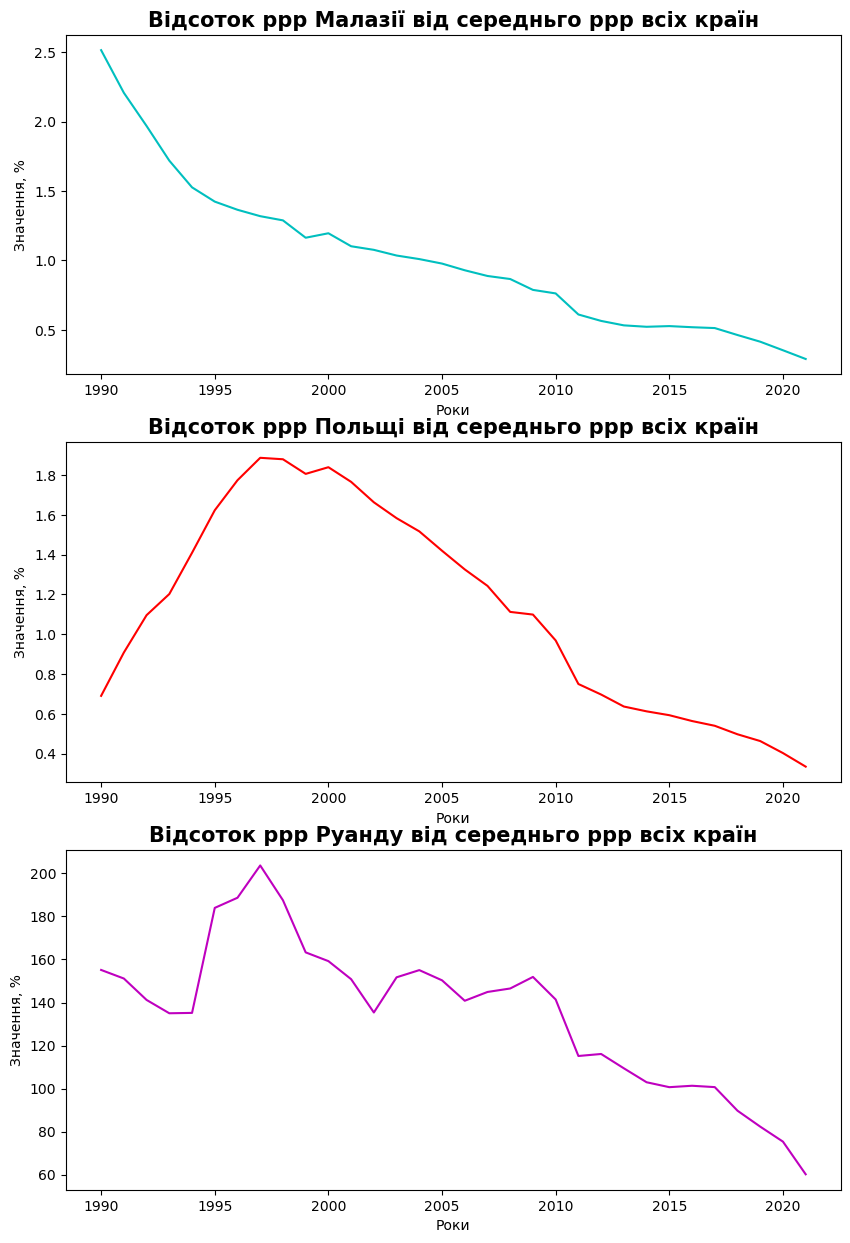

In [24]:
# Побудуємо графік
fig8, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,15))

ax1.plot(perc_ppp_Malaysia.index.values, perc_ppp_Malaysia['mean'], c='c')
ax1.set_title('Відсоток ррр Малазії від середньго ррр всіх країн',fontweight ='bold', fontsize = 15)
ax1.set_xlabel('Роки', fontsize = 10)
ax1.set_ylabel('Значення, %',fontsize = 10)

ax2.plot(perc_ppp_Poland.index.values, perc_ppp_Poland['mean'], c='r')
ax2.set_title('Відсоток ррр Польщі від середньго ррр всіх країн',fontweight ='bold', fontsize = 15)
ax2.set_xlabel('Роки',  fontsize = 10)
ax2.set_ylabel('Значення, %',  fontsize = 10)

ax3.plot(perc_ppp_Rwanda.index.values, perc_ppp_Rwanda['mean'], c='m')
ax3.set_title('Відсоток ррр Руанду від середньго ррр всіх країн', fontweight ='bold', fontsize = 15)
ax3.set_xlabel('Роки',  fontsize = 10)
ax3.set_ylabel('Значення, %',  fontsize = 10)

plt.show()
# Збережемо отриманий рисунок 
fig8.savefig('../img/perc_ppp_country.png')